# Preprocessing Examples

In [93]:
from epimodel.preprocessing.data_preprocessor import preprocess_data
import numpy as np
import pandas as pd

## Example Dataset

Data format:

In [79]:
pd.read_csv('../notebooks/double-entry-data/double_entry_final.csv').head()

,Country Code,Date,Region Name,Confirmed,Active,Deaths,Mask Wearing,Symptomatic Testing,Gatherings <1000,Gatherings <100,...,Some Businesses Suspended,Most Businesses Suspended,School Closure,University Closure,Stay Home Order,Travel Screen/Quarantine,Travel Bans,Public Transport Limited,Internal Movement Limited,Public Information Campaigns
0,AL,2020-01-22 00:00:00+00:00,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AL,2020-01-23 00:00:00+00:00,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AL,2020-01-24 00:00:00+00:00,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AL,2020-01-25 00:00:00+00:00,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AL,2020-01-26 00:00:00+00:00,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Loading example data:

In [80]:
data = preprocess_data('../notebooks/double-entry-data/double_entry_final.csv')

Dropping NPI Travel Screen/Quarantine
Dropping NPI Travel Bans
Dropping NPI Public Transport Limited
Dropping NPI Internal Movement Limited
Dropping NPI Public Information Campaigns
Dropping NPI Symptomatic Testing
Masking invalid values


## Exploring Preprocessed Data

NPI names:

In [81]:
data.CMs

['Mask Wearing',
 'Gatherings <1000',
 'Gatherings <100',
 'Gatherings <10',
 'Some Businesses Suspended',
 'Most Businesses Suspended',
 'School Closure',
 'University Closure',
 'Stay Home Order']

Region codes and names:

In [82]:
data.RNames.groupby(level=0).first()

Country Code
AD                   Andorra
AL                   Albania
AT                   Austria
BA    Bosnia and Herzegovina
BE                   Belgium
BG                  Bulgaria
CH               Switzerland
CZ            Czech Republic
DE                   Germany
DK                   Denmark
EE                   Estonia
ES                     Spain
FI                   Finland
FR                    France
GB            United Kingdom
GE                   Georgia
GR                    Greece
HR                   Croatia
HU                   Hungary
IE                   Ireland
IL                    Israel
IS                   Iceland
IT                     Italy
LT                 Lithuania
LV                    Latvia
MA                   Morocco
MT                     Malta
MX                    Mexico
MY                  Malaysia
NL               Netherlands
NO                    Norway
NZ               New Zealand
PL                    Poland
PT                  Portugal
R

All preprocessed data parameters

In [111]:
data_details = {'Dates': data.Ds,
                'Region Abbreviations':data.Rs,
                'Region Names':data.RNames,
                'NPI names':data.CMs,
                'Active cases': data.Active,
                'Confirmed cases': data.Confirmed,
                'Deaths':data.Deaths,
                'New Deaths':data.NewDeaths,
                'New Cases':data.NewCases,
                'Active NPIs':data.ActiveCMs}

for k,v in data_details.items():
    try:
        dtype = v.dtype
    except AttributeError:
        dtype = type(v[0])
    print(f'{k} | Type:{type(v)} ({dtype}), Shape:{np.array(v).shape}')

Dates | Type:<class 'list'> (<class 'pandas._libs.tslibs.timestamps.Timestamp'>), Shape:(130,)
Region Abbreviations | Type:<class 'list'> (<class 'str'>), Shape:(30,)
Region Names | Type:<class 'pandas.core.series.Series'> (object), Shape:(5330,)
NPI names | Type:<class 'list'> (<class 'str'>), Shape:(9,)
Active cases | Type:<class 'numpy.ma.core.MaskedArray'> (float64), Shape:(30, 130)
Confirmed cases | Type:<class 'numpy.ma.core.MaskedArray'> (float64), Shape:(30, 130)
Deaths | Type:<class 'numpy.ma.core.MaskedArray'> (float64), Shape:(30, 130)
New Deaths | Type:<class 'numpy.ma.core.MaskedArray'> (float64), Shape:(30, 130)
New Cases | Type:<class 'numpy.ma.core.MaskedArray'> (float64), Shape:(30, 130)
Active NPIs | Type:<class 'numpy.ndarray'> (float64), Shape:(30, 9, 130)


## Plotting Preprocesed Data

'Font Awesome 5 Free-Solid-900.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


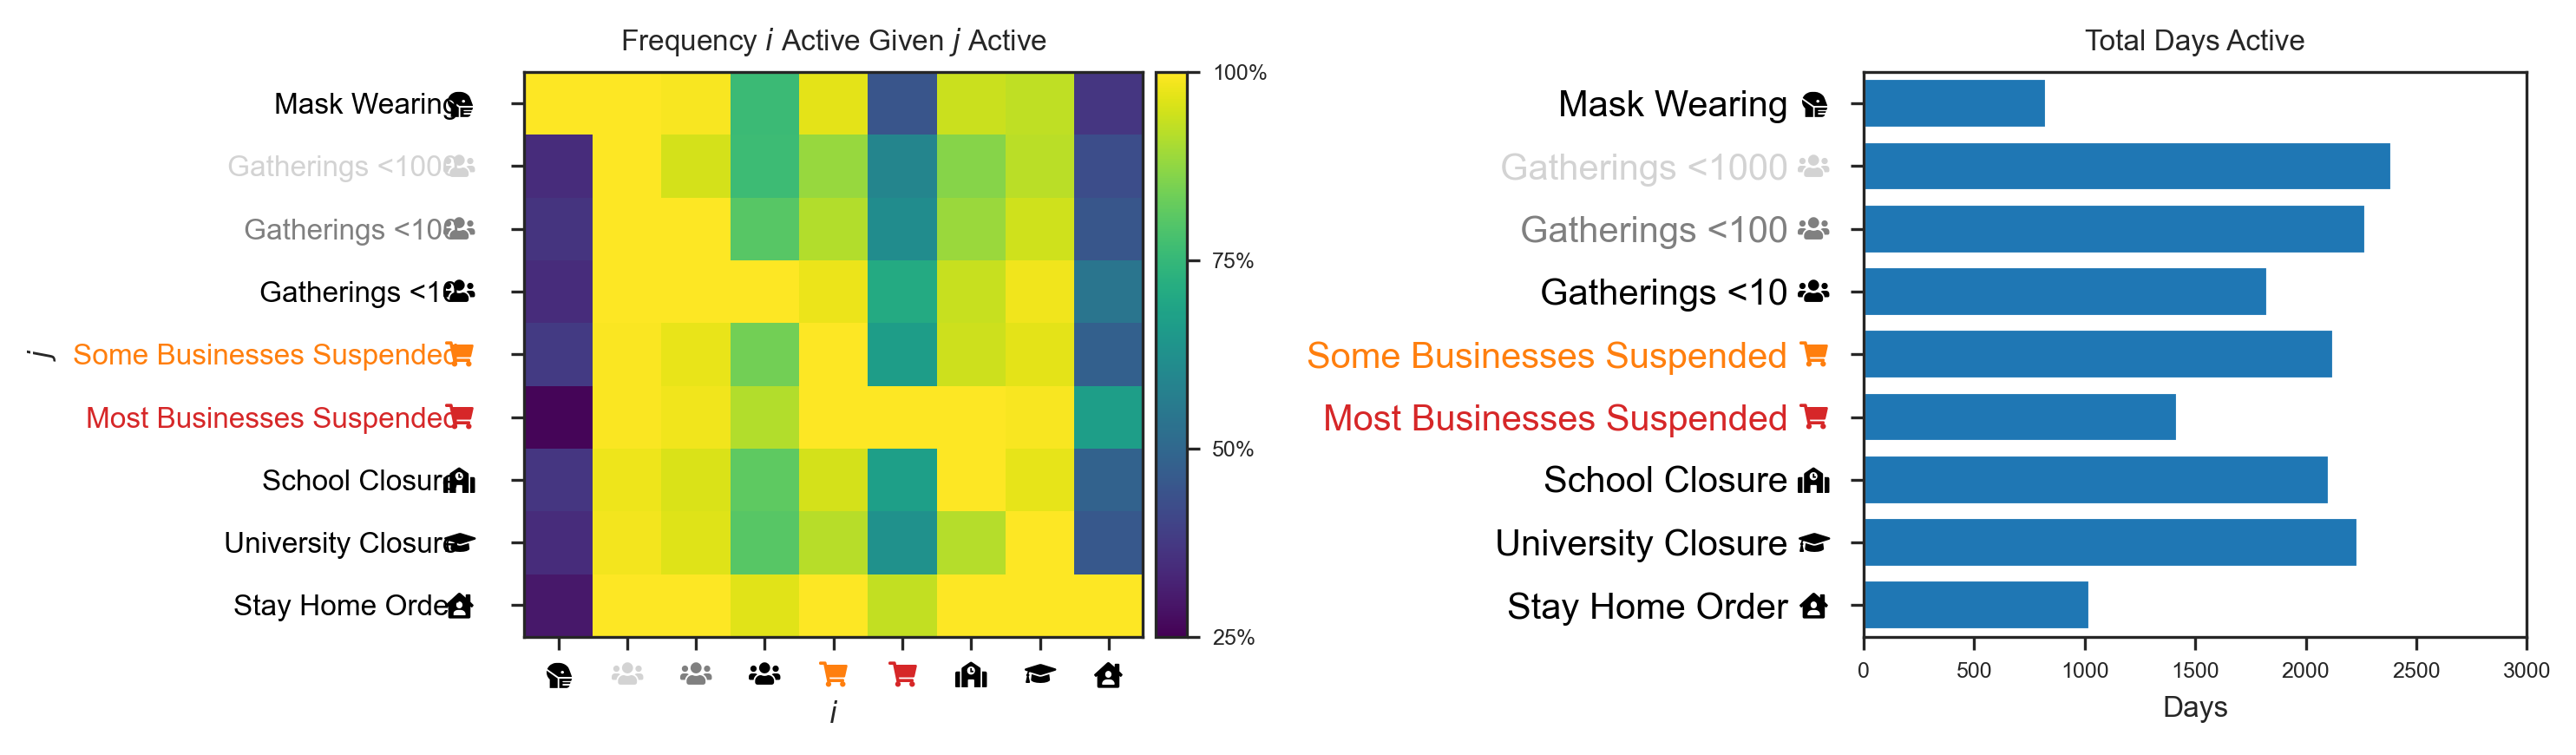

In [84]:
cm_plot_style = [
            ("\uf963", "black"), # mask
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2
            ("\uf549", "black"), # school
            ("\uf19d", "black"), # university
            ("\uf965", "black"), # home
            ("\uf072", "grey"), # plane1
            ("\uf072", "black"), # plane2
            ("\uf238", "black"), # train
            ("\uf1b9", "black"), # car
            ("\uf641", "black") # flyer
        ]
data.summary_plot(cm_plot_style)

## Preprocessed Data Operations

Remove regions with fewer than 100 total deaths:

In [83]:
data.remove_regions_min_deaths(100)

Region AL removed since it has 33.0 deaths on the last day
Region AD removed since it has 51.0 deaths on the last day
Region EE removed since it has 67.0 deaths on the last day
Region GE removed since it has 12.0 deaths on the last day
Region IS removed since it has 10.0 deaths on the last day
Region LV removed since it has 24.0 deaths on the last day
Region LT removed since it has 70.0 deaths on the last day
Region MT removed since it has -- deaths on the last day
Region NZ removed since it has 22.0 deaths on the last day
Region SG removed since it has 23.0 deaths on the last day
Region SK removed since it has 28.0 deaths on the last day


Remove region 'AL':

In [112]:
data.remove_regions_from_codes('AL')

Mask dates for which NPIs were deactivated

In [113]:
data.mask_reopenings()

Masking AT from 2020-05-04 00:00:00+00:00
Masking AT from 2020-05-21 00:00:00+00:00
Masking BE from 2020-05-14 00:00:00+00:00
Masking BA from 2020-05-17 00:00:00+00:00
Masking BG from 2020-05-04 00:00:00+00:00
Masking BG from 2020-05-21 00:00:00+00:00
Masking HR from 2020-04-30 00:00:00+00:00
Masking HR from 2020-05-14 00:00:00+00:00
Masking HR from 2020-05-29 00:00:00+00:00
Masking CZ from 2020-04-27 00:00:00+00:00
Masking CZ from 2020-05-14 00:00:00+00:00
Masking CZ from 2020-05-28 00:00:00+00:00
Masking DK from 2020-04-23 00:00:00+00:00
Masking DK from 2020-05-14 00:00:00+00:00
Masking FI from 2020-05-17 00:00:00+00:00
Masking FR from 2020-05-14 00:00:00+00:00
Masking DE from 2020-04-23 00:00:00+00:00
Masking DE from 2020-05-07 00:00:00+00:00
Masking DE from 2020-05-09 00:00:00+00:00
Masking GR from 2020-05-07 00:00:00+00:00
Masking GR from 2020-05-14 00:00:00+00:00
Masking HU from 2020-05-07 00:00:00+00:00
Masking HU from 2020-05-21 00:00:00+00:00
Masking IL from 2020-04-29 00:00:0

Mask the final 20 days for all regions:

In [114]:
data.mask_region_ends(20)

Mask all but the first 14 days for region 'AT'

In [115]:
data.mask_region('AT',days=14)

(61, 75)

Unmask data

In [116]:
data.unmask_all()